In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.filterwarnings("ignore")

In [18]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [10]:
from Utils.utils import GetMeasurements
from Utils.utils import PPT

In [11]:
data_folder = Path('..', 'data', 'human')
folder_2P = Path('..', 'reports', 'MLE')

file_name = '2-player-UR.csv'
file = data_folder / Path(file_name)

print(f'Loading data from {file}...')
data = pd.read_csv(file)
group_column = PPT.get_group_column(data)
data.head()

Loading data from ../data/human/2-player-UR.csv...


,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,source,treatment,group,round,player,choice,score,attendance,ac_score,threshold,num_players,room,decision
0,0,0,0,0,0,human,score + grid,Grupo-0001,1,405186428721292,0,0,1,25,0.5,2,Grupo-0001,0
1,1,1,1,1,1,human,score + grid,Grupo-0001,1,728608683559397,1,1,1,25,0.5,2,Grupo-0001,1
2,2,2,2,2,2,human,score + grid,Grupo-0001,2,405186428721292,1,1,1,25,0.5,2,Grupo-0001,1
3,3,3,3,3,3,human,score + grid,Grupo-0001,2,728608683559397,0,0,1,25,0.5,2,Grupo-0001,0
4,4,4,4,4,4,human,score + grid,Grupo-0001,3,405186428721292,0,0,1,25,0.5,2,Grupo-0001,0


In [ ]:
measures = ['conditional_entropy']
rounds = data['round'].unique()
cond_entropies = list()
groups = list()
rounds_ = list()

for round_ in rounds[5:]:
    print(f'Processing round {round_}...')
    df = data[data['round'] <= round_].copy()    
    # Get measurements
    m = GetMeasurements(data=df, measures=measures)
    df_meas = m.get_measurements()
    cond_entropies += df_meas['conditional_entropy'].values.tolist()
    groups += df_meas[group_column].values.tolist()
    rounds_ += [round_] * len(df_meas[group_column].values.tolist())

df = pd.DataFrame({
    'round': rounds_,
    'group': groups,
    'conditional_entropy': cond_entropies
})
df.head()

Processing round 6...
df_meas.columns: Index(['treatment', 'threshold', 'room', 'num_players', 'conditional_entropy'], dtype='object')
Processing round 7...
df_meas.columns: Index(['treatment', 'threshold', 'room', 'num_players', 'conditional_entropy'], dtype='object')
Processing round 8...
df_meas.columns: Index(['treatment', 'threshold', 'room', 'num_players', 'conditional_entropy'], dtype='object')
Processing round 9...
df_meas.columns: Index(['treatment', 'threshold', 'room', 'num_players', 'conditional_entropy'], dtype='object')
Processing round 10...
df_meas.columns: Index(['treatment', 'threshold', 'room', 'num_players', 'conditional_entropy'], dtype='object')
Processing round 11...
df_meas.columns: Index(['treatment', 'threshold', 'room', 'num_players', 'conditional_entropy'], dtype='object')
Processing round 12...
df_meas.columns: Index(['treatment', 'threshold', 'room', 'num_players', 'conditional_entropy'], dtype='object')
Processing round 13...
df_meas.columns: Index(['trea

,round,group,conditional_entropy
0,6,Grupo-0011,0.400000
1,6,Grupo-0012,0.400000
2,6,Grupo-0013,0.275489
3,6,Grupo-0014,0.275489
4,6,Grupo-0015,0.475489


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


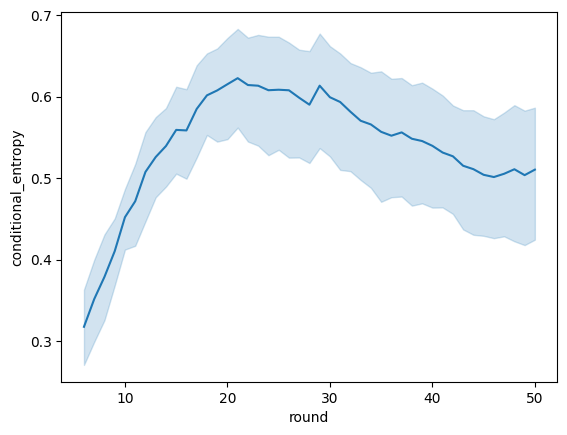

In [21]:
sns.lineplot(data=df, x='round', y='conditional_entropy')#, hue='group')
plt.legend().remove()